In [1]:
import numpy as np
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
year_of_interest = '1999' 

path = f'C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/all_years/download_precip_Bruxelles_{year_of_interest}.nc'


data = nc.Dataset(path)
first_year=1959
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [2]:
data.variables.keys()
data.variables['tp'][:].shape

(8760, 1, 1)

In [3]:

hourly_data = data.variables['tp'][0:4344,0,0].flatten()

# Create a DataFrame with the hourly data
df = pd.DataFrame(hourly_data, columns=['value'])

# Create a date range for the period covered by your data
date_range = pd.date_range(start=f'{year_of_interest}-01-01', periods=len(hourly_data),freq='H')

# Assign the date range to the DataFrame as an index
df.index = date_range

# Resample the data by month and aggregate (e.g., sum, mean)
monthly_data = df.resample('M').sum()  # You can also use .mean(), .max(), etc.

monthly_array = np.array([[month, value[0]] for month, value in monthly_data.iterrows()])
monthly_data.index

DatetimeIndex(['1999-01-31', '1999-02-28', '1999-03-31', '1999-04-30',
               '1999-05-31', '1999-06-30'],
              dtype='datetime64[ns]', freq='M')

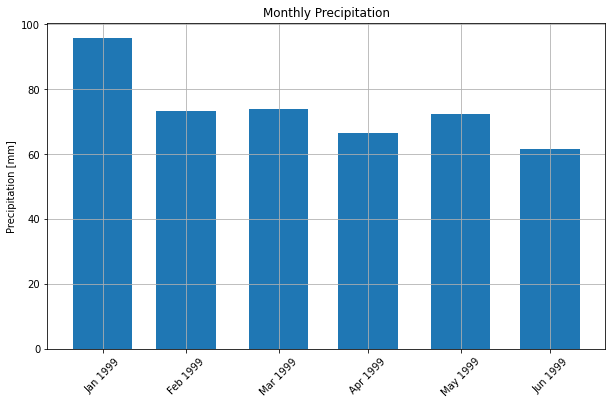

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_data.index, monthly_data['value']*1000,width=20)
plt.ylabel('Precipitation [mm]')
plt.title('Monthly Precipitation')
plt.grid()
plt.xticks(monthly_data.index, monthly_data.index.strftime('%b %Y'), rotation=45)
plt.show()

In [5]:
all_years = os.listdir('C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/all_years')
historic_precipitation=[]

for year in all_years:
    data=nc.Dataset(f'C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/all_years/{year}')
    year_len=len(data.variables['tp'][:,0,0].flatten())
    total_precipitation = data.variables['tp'][0:int(year_len/2),0,0].flatten().sum()
    historic_precipitation.append(total_precipitation)

year2024=os.listdir('C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/2024')
sum2024=0
for month in year2024:
    data=nc.Dataset(f'C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/2024/{month}')
    tp_moi=data.variables['tp'][:,0,0].flatten().sum()
    sum2024+=tp_moi
historic_precipitation.append(sum2024)
np.mean(historic_precipitation)


0.4020434715393077

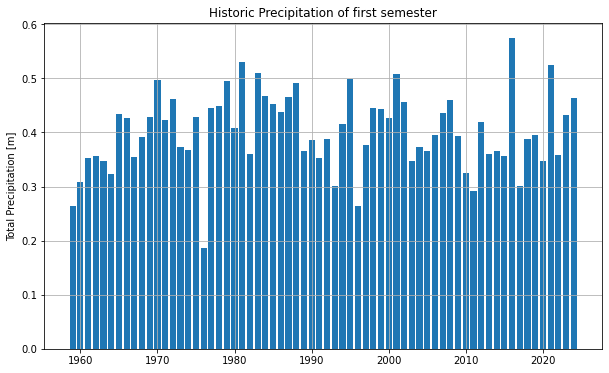

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(years, historic_precipitation)
plt.ylabel('Total Precipitation [m]')
plt.title('Historic Precipitation of first semester')
plt.grid()
plt.show()

In [15]:
datatest=nc.Dataset('C:/Users/anton/Documents/Master2/Memoire/Scripts/precip/data/2024/download_precip_Bruxelles_2024_01.nc')

datatest['tp'][:,0,0].flatten().sum()

0.07193281646061203